In [1]:
## IMPORTING LYBRARIES
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

## MNIST DATASET  FETCHING

In [15]:
from sklearn.datasets import fetch_openml
mnist= fetch_openml('mnist_784',version=1) 

In [3]:
# mnist = pd.DataFrame(data=mnist['data'], columns = mnist['feature_names'])
# mnist.to_csv('mnist.txt', sep = ',', index = False)


In [16]:
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [17]:
print(f"Data or features= {mnist['data'].shape} and target or label= {mnist['target'].shape}")


Data or features= (70000, 784) and target or label= (70000,)


### mnist dataset label and features seperation and convert label string to int 

In [18]:
X,y = mnist['data'],mnist['target']
y= y.astype(np.uint8) # convert string to unsigned 8 bit integer

(-0.5, 27.5, 27.5, -0.5)

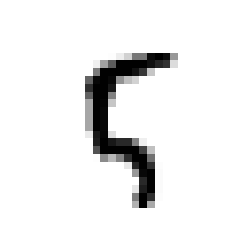

In [19]:
some_data=X[100]
some_image=some_data.reshape(28,28)
plt.imshow(some_image,cmap="binary")
plt.axis("off")


In [20]:
some_data_label=y[100]
some_data_label

5

## TRAIN AND TEST SET SPLIT ,HERE 0 TO 5999 IS TRAINING SET AND REST ARE TESTING SET

In [58]:
X_train,X_test,y_train,y_test=X[:6000],X[6000:],y[:6000],y[6000:]

## Trying to detect 3 or not as a binary classifier

In [59]:
y_train_3 = (y_train==3)
y_test_3 = (y_train==3)


### Stochastic Gradient Descent classifier

In [54]:
from sklearn.linear_model import SGDClassifier

In [60]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_3)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [66]:
some_digit= X[100]
sgd_clf.predict([some_digit])

array([False])

In [68]:
y_train_3[100]

False

## Some predictions 

In [114]:
sgd_clf.predict([X[100],X[405],X[500]])  ## here 405,500  item is worngly predicted 

array([False,  True, False])

In [115]:
y_train_3[[100,405,500]]

array([False,  True,  True])

In [116]:
y_train[[405,500]]

array([5, 3, 3], dtype=uint8)

(-0.5, 27.5, 27.5, -0.5)

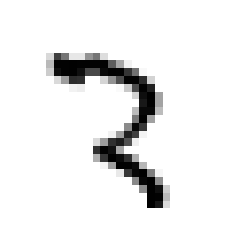

In [89]:
some_data=X[500]
some_image=some_data.reshape(28,28)
plt.imshow(some_image,cmap="binary")
plt.axis("off")  ## it looks like 2

## RndomForestClassifier

In [106]:
from sklearn.ensemble import RandomForestClassifier

In [117]:
forest_clf = RandomForestClassifier()
forest_clf.fit(X_train,y_train_3)

C:\Users\ARNAB DAS\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [118]:
forest_clf.predict([X[100],X[405],X[500]]) # it detects all the digits correctly

array([False,  True,  True])

In [109]:
y_train_3[[100,405,500]]

array([False,  True,  True])

## Performance measures

In [9]:
# # function for performance measurement

def performance_measurement_for_classification(model,X_train,y_train,cv=3):
    from sklearn.model_selection import cross_val_predict , cross_val_score
    from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score
    
    accuracy = cross_val_score(model,X_train,y_train,cv=cv,scoring="accuracy")
    accuracy_mean = accuracy.mean()
    
    y_train_pred = cross_val_predict(model,X_train,y_train,cv=cv)
    confusion_matrix=confusion_matrix(y_train,y_train_pred)
    precision_score=precision_score(y_train,y_train_pred)
    recall_score=recall_score(y_train,y_train_pred)
    f1_score = f1_score(y_train,y_train_pred)
    
    return {'accuracy':accuracy,'accuracy_mean':accuracy_mean,'confusion_matrix':confusion_matrix,'precision_score':precision_score,'recall_score':recall_score,'f1_score':f1_score}
    
    
    

In [10]:
sdg_performance = performance_measurement_for_classification(sgd_clf,X_train,y_train_3,5)
forest_performance = performance_measurement_for_classification(forest_clf,X_train,y_train_3,5)

NameError: name 'sgd_clf' is not defined

In [149]:
sdg_performance,forest_performance
# random forest gives more precision but less recall,where sdg gives more recall but less precision. 
#Thats why sdg predict more false positive and lesser false negetive

({'accuracy': array([0.95170691, 0.95920067, 0.955     , 0.95663053, 0.95329441]),
  'accuracy_mean': 0.9551665028934048,
  'confusion_matrix': array([[5245,  147],
         [ 122,  486]], dtype=int64),
  'precision_score': 0.7677725118483413,
  'recall_score': 0.7993421052631579,
  'f1_score': 0.7832393231265108},
 {'accuracy': array([0.95753539, 0.95503747, 0.96416667, 0.95829858, 0.97164304]),
  'accuracy_mean': 0.9613362281270103,
  'confusion_matrix': array([[5384,    8],
         [ 224,  384]], dtype=int64),
  'precision_score': 0.9795918367346939,
  'recall_score': 0.631578947368421,
  'f1_score': 0.768})

In [130]:
np.count_nonzero(y_train_3==True),np.count_nonzero(y_train_3==False)

(608, 5392)